<div style="text-align:left;font-size:2em"><span style="font-weight:bolder;font-size:1.25em">SP2273 | Learning Portfolio</span><br><br><span style="font-weight:bold;color:darkred">Random Numbers (Good)</span></div>

## 1 Random numbers from other distributions

### 1.1 Random numbers from the Normal distribution

In [1]:
np.random.normal(loc=7, scale=3, size=15)   # 15 numbers from a normal distribution with a mean of 7, standard deviation of 3

array([ 5.60850091,  6.08337867,  5.67519244, 10.39092399, 10.92743385,
        7.98488668,  4.44288567, 12.86629663, 10.42101839,  8.42318028,
       10.6781386 , 12.72361495, 10.24383934, 11.05984555,  8.92621657])

### 1.2 Visualising the random numbers

Text(0, 0.5, 'Value of random number')

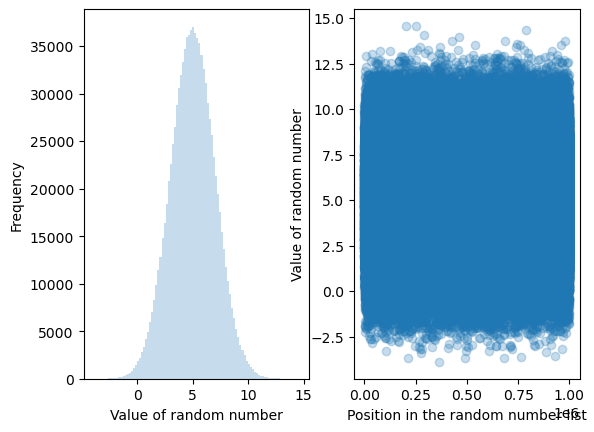

In [4]:
from matplotlib import pyplot as plt

n = 1000000
random_numbers = np.random.normal(loc=5, scale=2, size=n)

fig, ax = plt.subplots(nrows=1, ncols=2)

axis = ax[0]
axis.hist(random_numbers, bins=100, alpha=.25)
axis.set_xlabel("Value of random number")
axis.set_ylabel("Frequency")

# A clear normal distribution curve that centers at the mean is generated when n reaches a large number.

axis = ax[1]
axis.scatter(range(n), random_numbers, alpha=.25)
axis.set_xlabel("Position in the random number list")
axis.set_ylabel("Value of random number")

# The points are most concentrated at the mean, and get less concentrated moving away from the mean.

### 1.3 68%?

In [2]:
n = 10000
mean, sd = 5, 2
random_numbers = np.random.normal(loc=mean, scale=sd, size=n)

mask = (random_numbers >= mean - sd) & (random_numbers <= mean + sd)

print(f'% of points between 1 std.dev. from the mean: {np.sum(mask)/n*100:.2f}%')

% of points between 1 std.dev. from the mean: 67.58%


## 1 Brownian Motion in 1D

### 1.1 The scenario

### 1.2 The simulation

In [16]:
import numpy.random as rnd

def brown_1d(prob_right=.5, no_of_steps=10000):
    step_size = 1
    x = 0    # starting position
    
    for _ in range(no_of_steps):
        if rnd.random() < prob_right:
            x += step_size
        else:
            x -= step_size
        
    return x

Text(0.5, 1.0, 'Probability distribution for 1D Random walk with p=0.5')

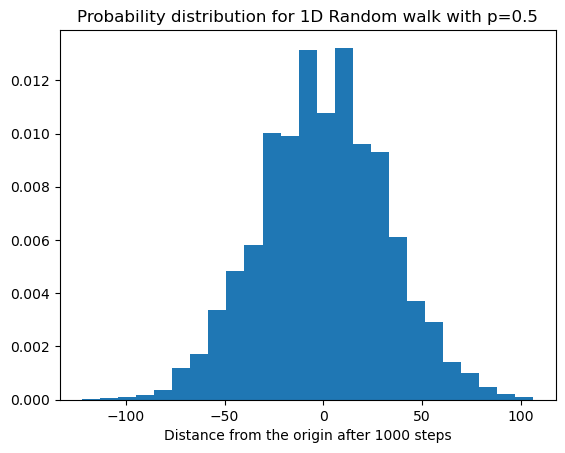

In [11]:
no_of_steps, p = 1_000, .5
repeats = 10_000
results = [brown_1d(prob_right=p, no_of_steps=no_of_steps)
           for _ in range(repeats)]

plt.hist(results, bins=25, density=True)
plt.xlabel(f'Distance from the origin after {no_of_steps} steps')
plt.title(f'Probability distribution for 1D Random walk with p={p}')

Text(0.5, 1.0, 'Probability distribution for 1D Random walk with p=0.6')

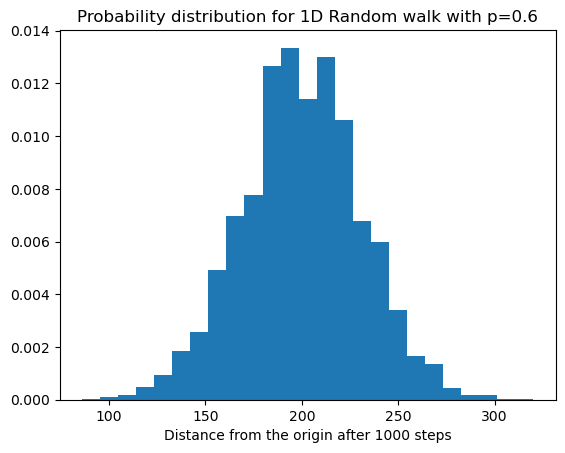

In [12]:
no_of_steps, p = 1_000, .6
repeats = 10_000
results = [brown_1d(prob_right=p, no_of_steps=no_of_steps)
           for _ in range(repeats)]

plt.hist(results, bins=25, density=True)
plt.xlabel(f'Distance from the origin after {no_of_steps} steps')
plt.title(f'Probability distribution for 1D Random walk with p={p}')

### 1.3 What does theory say?

In [13]:
def normal(x, m=0, s=1):
    s2 = s**2
    output = np.exp(-(x-m)**2/ (2*s2))
    output /= np.sqrt(2*np.pi*s2)
    return output

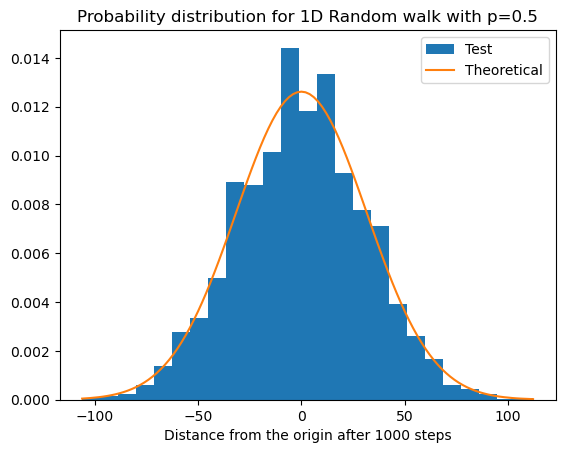

In [23]:
no_of_steps, p = 1_000, .5
repeats = 10_000
results = [brown_1d(prob_right=p, no_of_steps=no_of_steps)
           for _ in range(repeats)]

plt.hist(results, bins=25, density=True, label='Test')
plt.xlabel(f'Distance from the origin after {no_of_steps} steps')
plt.title(f'Probability distribution for 1D Random walk with p={p}')

prob_left = 1 - p                                # q = 1 -p
mean = no_of_steps * (p - prob_left)             # mean = N(p - q)
sd = np.sqrt(4*no_of_steps*p*prob_left)          # sd = sqrt(4 N p q)
x = np.unique(results)                           # Numbers that form 
                                                 # the x-axis
plt.plot(x, normal(x, mean, sd), label='Theoretical')
plt.legend(loc='upper right')
plt.show()

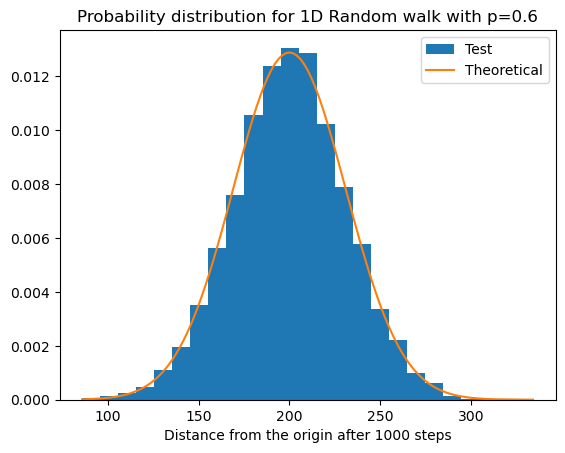

In [21]:
no_of_steps, p = 1_000, .6
repeats = 10_000
results = [brown_1d(prob_right=p, no_of_steps=no_of_steps)
           for _ in range(repeats)]

plt.hist(results, bins=25, density=True, label='Test')
plt.xlabel(f'Distance from the origin after {no_of_steps} steps')
plt.title(f'Probability distribution for 1D Random walk with p={p}')

prob_left = 1 - p                                # q = 1 -p
mean = no_of_steps * (p - prob_left)             # mean = N(p - q)
sd = np.sqrt(4*no_of_steps*p*prob_left)          # sd = sqrt(4 N p q)
x = np.unique(results)                           # Numbers that form 
                                                 # the x-axis
plt.plot(x, normal(x, mean, sd), label='Theoretical')
plt.legend(loc='upper right')
plt.show()

## 2 Estimating \(\pi\)

### 2.1 The method

:)

### 2.2 A poor but intuitive solution

In [28]:
N_total = 100_000
N_green = 0

for _ in range(N_total):
    x = rnd.uniform(low=-1, high=1, size=1)
    y = rnd.uniform(low=-1, high=1, size=1)
    r = np.sqrt(x**2 + y**2)                  # Distance from the origin
    
    if r <= 1:
        N_green += 1                          # if radius is less than 1,
                                              # the point is in the circle.
4 * N_green / N_total

3.14744

### 2.3 A better solution

In [26]:
N_total=1_000_000
x=rnd.uniform(low=-1, high=1, size=N_total)
y=rnd.uniform(low=-1, high=1, size=N_total)
N_green= np.sum((x**2+y**2) <= 1)

4 * (N_green / N_total)

3.14204

### 2.4 A smarter solution

In [30]:
N_total = 1_000_000
x=rnd.rand(N_total)                        # the range is already between 0
y=rnd.rand(N_total)                        # and 1, hence uniform() is not
N_green=np.sum((x**2+y**2) <= 1)           # needed.

4* (N_green / N_total)

3.141932

## Exercise 1 :  Vital Stats of Random π

In [38]:
def estimate_pi(n):
    x=rnd.rand(n)
    y=rnd.rand(n)
    N_green=np.sum((x**2+y**2) <= 1)
    
    return 4 * (N_green / n)

In [83]:
result = [estimate_pi(n=10000) for _ in range(100)]

mean = np.mean(result)
sd = np.std(result)
print(f"Mean: {mean}, Standard Deviation: {sd}")

Mean: 3.1404039999999993, Standard Deviation: 0.01670501673150912


In [87]:
m_all = []
s_all = []
n_options = [10, 100, 1000, 10_000, 100_000, 1_000_000]

for n in n_options:
    result = [estimate_pi(n) for _ in range(100)]
    
    
    m = np.mean(result)
    s = np.std(result)

    m_all.append(m)
    s_all.append(s)

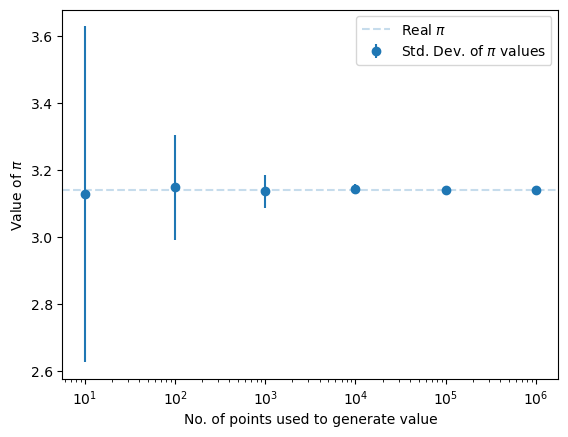

In [92]:
fig, ax = plt.subplots(nrows=1,ncols=1)
ax.set_xscale('log')
ax.axhline(y = np.pi, alpha = 0.25, ls = 'dashed', label = r'Real $\pi$')
ax.errorbar(n_options, m_all, yerr=s_all, fmt='o',label=r'Std. Dev. of $\pi$ values')
ax.set_xlabel('No. of points used to generate value')
ax.set_ylabel(r'Value of $\pi$')
ax.legend()
plt.show()